# Shor's normal algorithm

- Requires a lot of time, since there is no SemiClassical Fourier Transform

In [1]:
from impl.shors.Shors_Original import shors_original

shots = 1000

# Create Circuit

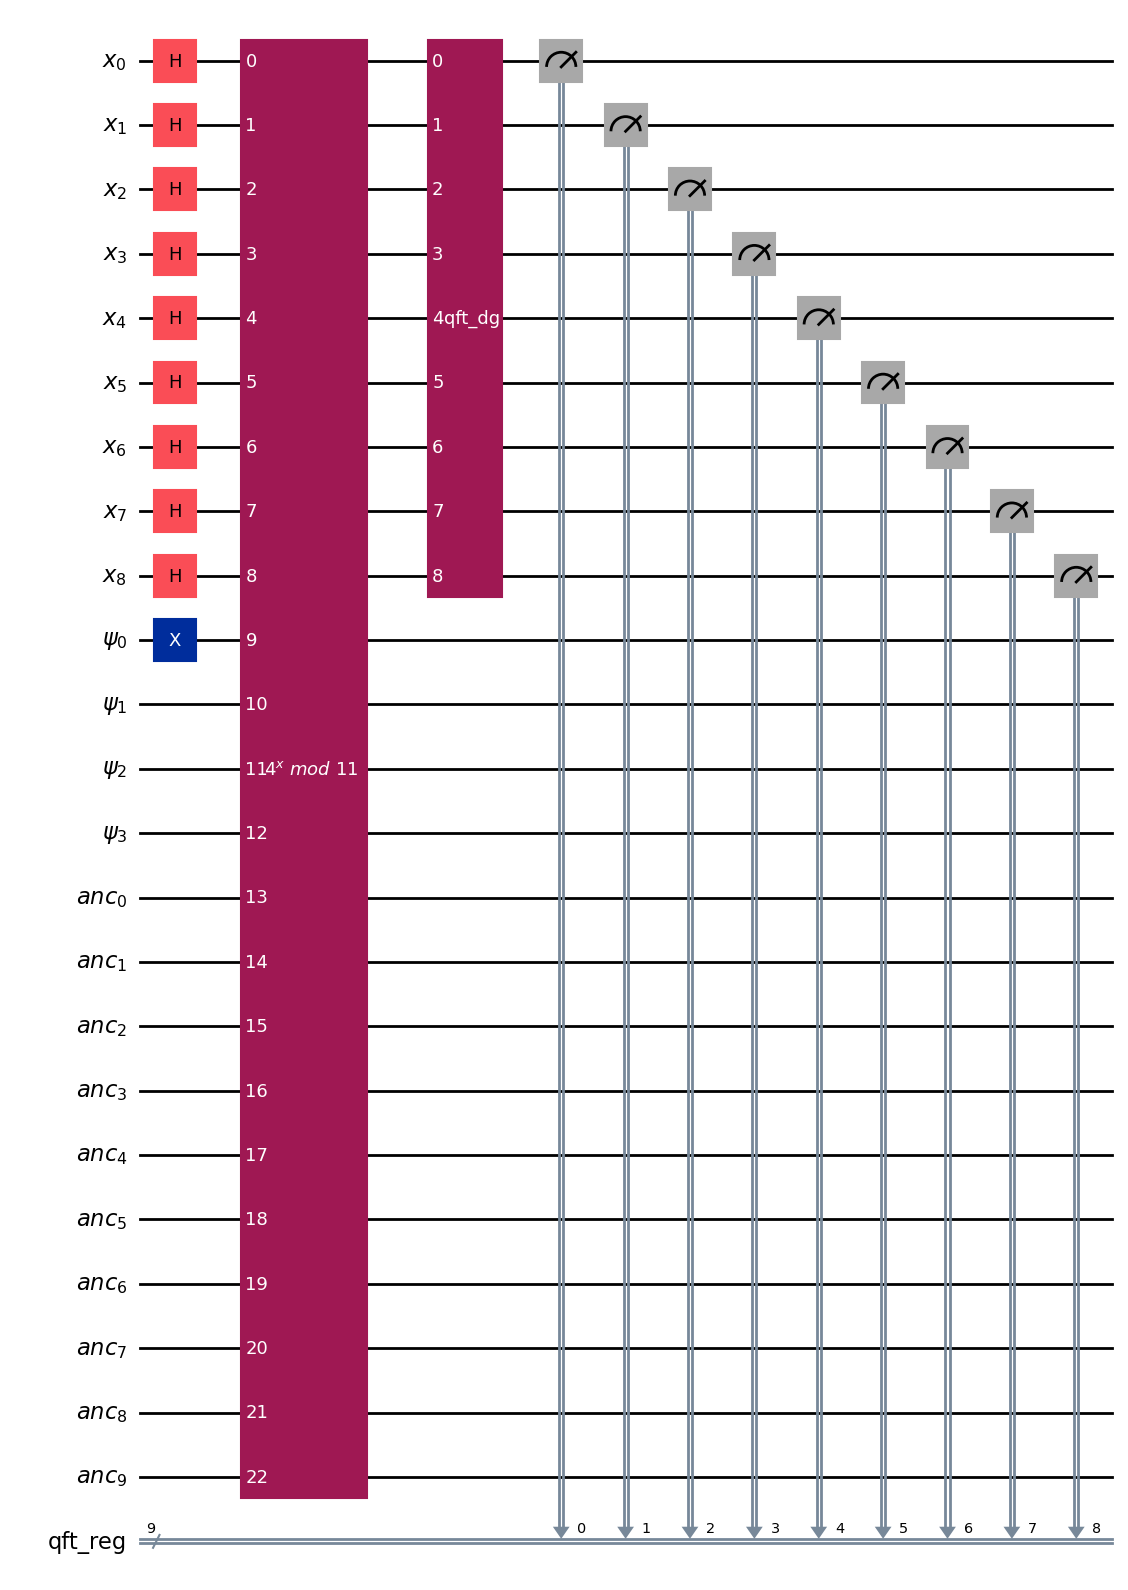

In [2]:
from api.Metrics import gate_count_metric
from api.CircuitChooser import CircuitChooser

# g^k = 1 mod p, find k
p = 11
g = 4
r = -1

CircuitChooser()._metric = gate_count_metric
circuit = shors_original(g, p)

circuit.draw(output='mpl', fold=-1)

# Run Circuit

In [3]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

simulator = AerSimulator()
# Allow circuit to run on our backend.

circuit = generate_preset_pass_manager(backend=simulator, optimization_level=3).run(circuit)

print(circuit.count_ops())

job = simulator.run(circuit, shots=shots)

counts = job.result().get_counts()
print(counts)

OrderedDict({'ccx': 2272, 'cx': 2199, 'x': 487, 'mcx': 288, 'cp': 36, 'h': 18, 'measure': 9})
{'101000100': 1, '110100000': 1, '001101010': 2, '110000111': 1, '110011100': 1, '100110001': 3, '001010110': 1, '011001000': 2, '001101011': 2, '001100011': 1, '100110110': 2, '001100100': 7, '100110011': 211, '110010001': 1, '001100101': 12, '110010101': 1, '001100111': 45, '101110000': 1, '000000000': 199, '001101000': 7, '011011011': 1, '110011010': 120, '001100000': 3, '110011000': 7, '110011001': 53, '011010001': 1, '011001101': 148, '011001100': 9, '110011110': 2, '100110100': 12, '011001111': 3, '110011101': 3, '110011011': 7, '110101010': 1, '001100110': 106, '001101001': 3, '011001001': 2, '011001010': 1, '100110010': 5, '100110101': 2, '011001110': 4, '110001100': 1, '110010111': 2, '010101111': 1, '001101100': 2}


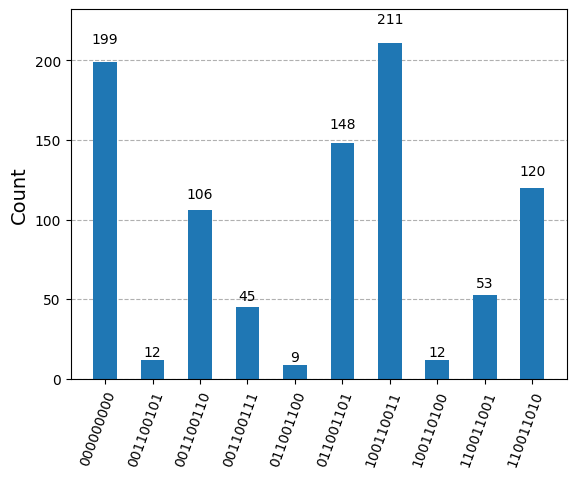

In [4]:
from qiskit.visualization import plot_histogram

filtered_counts = dict(filter(lambda item: not (isinstance(item[1], int) and item[1] < 8), counts.items()))
plot_histogram(filtered_counts)
# plot_distribution(counts)

In [5]:
import math
# Use Quaspy for post processing
from quaspy.math.groups import IntegerModRingMulSubgroupElement
from quaspy.orderfinding.general.postprocessing.ekera import solve_j_for_r

candidates = []
n = math.ceil(math.log2(p))
if r == -1:
    r = p - 1  # Backup frequency if all else fails, is always p - 1
    for (j, _) in counts.items():
        r_cand = solve_j_for_r(j, n, n, IntegerModRingMulSubgroupElement(g, p))
        candidates.append(r_cand)
        r = min(r, r_cand)

print(f"# measurements that extracted the period correctly: {candidates.count(r)}")
print(f"# measurements that extracted the period incorrectly: {len(candidates) - candidates.count(r)}")
print("Period: " + str(r))
# When we are solving for g^x = 1, then the period is the solution.
print("Solution: " + str(r))

# measurements that extracted the period correctly: 10
# measurements that extracted the period incorrectly: 35
Period: 5
Solution: 5
